In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [35]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Sonar.csv", header = None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
127,0.0209,0.0261,0.0120,0.0768,0.1064,0.1680,0.3016,0.3460,0.3314,0.4125,...,0.0057,0.0159,0.0085,0.0372,0.0101,0.0127,0.0288,0.0129,0.0023,0
76,0.0239,0.0189,0.0466,0.0440,0.0657,0.0742,0.1380,0.1099,0.1384,0.1376,...,0.0091,0.0151,0.0080,0.0018,0.0078,0.0045,0.0026,0.0036,0.0024,1
201,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,...,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031,0
180,0.0310,0.0221,0.0433,0.0191,0.0964,0.1827,0.1106,0.1702,0.2804,0.4432,...,0.0204,0.0059,0.0053,0.0079,0.0037,0.0015,0.0056,0.0067,0.0054,0
90,0.0126,0.0519,0.0621,0.0518,0.1072,0.2587,0.2304,0.2067,0.3416,0.4284,...,0.0208,0.0048,0.0199,0.0126,0.0022,0.0037,0.0034,0.0114,0.0077,1


In [36]:
df.shape

(208, 61)

In [37]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [38]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [39]:
df[60].value_counts()

60
0    111
1     97
Name: count, dtype: int64

In [40]:
X = df.drop(60, axis=1)
y = df[60]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 60, dtype: int64

In [41]:
y.value_counts()

60
0    111
1     97
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [43]:
X_train.shape, X_test.shape

((156, 60), (52, 60))

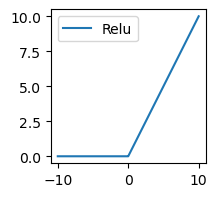

In [3]:
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(2, 2))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()

In [45]:
import tensorflow as tf
from tensorflow import keras 

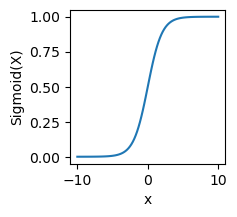

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 

plt.figure(figsize=(2, 2))  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show()

In [46]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 742us/step - loss: 0.6852 - accuracy: 0.5256
Epoch 2/100
20/20 [==============================] - 0s 864us/step - loss: 0.6516 - accuracy: 0.5449
Epoch 3/100
20/20 [==============================] - 0s 946us/step - loss: 0.6308 - accuracy: 0.7051
Epoch 4/100
20/20 [==============================] - 0s 842us/step - loss: 0.6004 - accuracy: 0.7436
Epoch 5/100
20/20 [==============================] - 0s 809us/step - loss: 0.5660 - accuracy: 0.7179
Epoch 6/100
20/20 [==============================] - 0s 933us/step - loss: 0.5300 - accuracy: 0.7885
Epoch 7/100
20/20 [==============================] - 0s 930us/step - loss: 0.5169 - accuracy: 0.7564
Epoch 8/100
20/20 [==============================] - 0s 892us/step - loss: 0.4714 - accuracy: 0.8077
Epoch 9/100
20/20 [==============================] - 0s 867us/step - loss: 0.4522 - accuracy: 0.8269
Epoch 10/100
20/20 [==============================] - 0s 836us/step - loss: 0.4274 - accura

In [47]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.7854 - accuracy: 0.8077


[0.7854134440422058, 0.807692289352417]

In [48]:
y_pred = model.predict(X_test).reshape(-1)
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 2ms/step
[0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]


In [49]:
y_test[:10]

12     1
80     1
33     1
5      1
187    0
83     1
116    0
122    0
90     1
154    0
Name: 60, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       0.86      0.73      0.79        26

    accuracy                           0.81        52
   macro avg       0.82      0.81      0.81        52
weighted avg       0.82      0.81      0.81        52



In [51]:
model_2 = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 896us/step - loss: 0.7489 - accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 0s 860us/step - loss: 0.7504 - accuracy: 0.4808
Epoch 3/100
20/20 [==============================] - 0s 875us/step - loss: 0.6920 - accuracy: 0.5769
Epoch 4/100
20/20 [==============================] - 0s 851us/step - loss: 0.7321 - accuracy: 0.4808
Epoch 5/100
20/20 [==============================] - 0s 834us/step - loss: 0.7162 - accuracy: 0.5064
Epoch 6/100
20/20 [==============================] - 0s 906us/step - loss: 0.6751 - accuracy: 0.5897
Epoch 7/100
20/20 [==============================] - 0s 896us/step - loss: 0.7081 - accuracy: 0.5256
Epoch 8/100
20/20 [==============================] - 0s 845us/step - loss: 0.6865 - accuracy: 0.5192
Epoch 9/100
20/20 [==============================] - 0s 883us/step - loss: 0.6697 - accuracy: 0.5962
Epoch 10/100
20/20 [==============================] - 0s 914us/step - loss: 0.6907 - accura

In [52]:
model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8269


[0.4217894673347473, 0.8269230723381042]

In [53]:
y_pred = model_2.predict(X_test).reshape(-1)
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 2ms/step
[0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]


In [54]:
y_test[:10]

12     1
80     1
33     1
5      1
187    0
83     1
116    0
122    0
90     1
154    0
Name: 60, dtype: int64

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        26
           1       0.95      0.69      0.80        26

    accuracy                           0.83        52
   macro avg       0.85      0.83      0.82        52
weighted avg       0.85      0.83      0.82        52

